# **REGRESSÃO LOGÍSTICA BINÁRIA**

Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import warnings

# Suprimir os warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
doenca_pre = pd.read_csv('covid_doencas_preexistentes.csv',
                    sep=';', encoding='utf-8')

## **ANÁLISE INICIAL**

Verificando as variáveis carregadas no bando de dados

Base de dados tras a informação de pessoas que receberam o diagnóstico de COVID perfil do paciente e doenças pré existentes.

In [ ]:
doenca_pre.head()

Descrição de variáveis
*   codigo_ibge: Código do município no IBGE (7 dígitos) de residência do paciente
*   nome_munic: Nome do município de residência do paciente
*   idade: Idade do paciente
*   cs_sexo: Sexo do paciente
*   diagnostico_covid19: Confirmação de COVID-19
*   data_inicio_sintomas: Data de início dos sintomas
*   obito: Indica se o paciente veio a óbito por COVID-19
*   asma: Paciente apresenta esse fator de risco (asma)
*   cardiopatia: Paciente apresenta esse fator de risco (cardiopatia)
*   diabetes: Paciente apresenta esse fator de risco (diabetes)
*   doenca_hematologica: Paciente apresenta esse fator de risco (doença hematológica)
*   doenca_hepatica: Paciente apresenta esse fator de risco (doença hepática)
*   doenca_neurologica: Paciente apresenta esse fator de risco (doença neurológica)
*   doenca_renal: Paciente apresenta esse fator de risco (doença renal)
*   imunodepressao: Paciente apresenta esse fator de risco (imunodepressão)
*   obesidade: Paciente apresenta esse fator de risco (obesidade)
*   outros_fatores_de_risco: Paciente apresenta outros fatores de risco
*   pneumopatia: Paciente apresenta esse fator de risco (pneumopatia)
*   puerpera: Paciente se encontra nesse estágio (puérpera)
*   sindrome_de_down: Paciente apresenta esse fator de risco (síndrome de down)

In [4]:
doenca_pre.shape

(1102362, 20)

**1ª Análise: Verificar se existe uma tendência de óbito entre pessoas do sexo feminino e masculino.**

In [5]:
from collections import Counter

Fazer contagem por categoria das variáveis

In [ ]:
Counter(doenca_pre.cs_sexo)

In [ ]:
doenca_pre['cs_sexo'].value_counts()

Como queremos comparar o gênero feminino e masculino iremos desconsiderar as demais classes.

Valores Missing (NAN)

In [ ]:
doenca_pre.isnull().sum()

Excluir valor NAN de cs_sexo

In [9]:
doenca_pre.dropna(subset=['cs_sexo'], inplace=True)

Excluir Ignorado

In [10]:
relacao = doenca_pre.loc[doenca_pre.cs_sexo != 'IGNORADO']

Excluir Indefinido

In [11]:
relacao = relacao.loc[relacao.cs_sexo != 'INDEFINIDO']

Verificando as variaveis que ficaram na base de dados

In [ ]:
relacao['cs_sexo'].value_counts()

Verificando os dados via análise gráfica

In [ ]:
import plotly.express as px

px.pie(relacao, names="cs_sexo")

**Análisando a quantidade de óbitos**

In [ ]:
relacao.obito.value_counts()

In [ ]:
px.pie(relacao, names="obito")

**Análise da classificação dos atributos**

Verificando como o Python reconheceu as variáveis

In [ ]:
relacao.dtypes

**Renomeando(sobrescrevendo) a variável obito**



In [17]:
relacao["obito"] = relacao["obito"].replace({0:"nao", 1:"sim"})

In [ ]:
relacao.head()

In [ ]:
relacao.dtypes

In [ ]:
relacao.obito.value_counts()

**Transformando em variáveis categóricas**

Transformando as variaveis que estão como objetos como categorias.

In [21]:
relacao['cs_sexo'] = relacao['cs_sexo'].astype('category')

In [22]:
relacao['obito'] = relacao['obito'].astype('category')

## **Modelo 1: Uma variável independente**

Queremos entender se a pessoa que foi diagnosticada com COVID, existe uma relação entre o gênero e o óbito.

Logo, teremos o primeiro modelo com uma única variável independente.

**Pressupostos :**

*   Variável dependente binária (dicotômica) -> Variável resposta (Y) dicotômica: Óbito - Sim ou Não.
*   Categorias mutuamente exclusivas - a mesma pessoa não pode estar em duas situações.
*   Independência das observações (sem medidas repetidas) -> a mesma pessoa é analisada uma única vez.

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Criação do modelo de Regressão logística

In [ ]:
modelo1 = smf.glm(formula='obito ~ cs_sexo', data=relacao, family = sm.families.Binomial()).fit()
print(modelo1.summary())

### Deviance Residuals

**Hipótese Testada:**

-   $H_0$: O modelo ajusta bem os dados.

-   $H_a$: O modelo não ajusta bem os dados.

**Condição de Aceitação/Rejeição:**

-   A deviance total é comparada com uma distribuição qui-quadrado com $n - p$ graus de liberdade, onde $n$ é o número de observações e $p$ é o número de parâmetros no modelo.

-   **Aceitação de** $H_0$: Se o valor $p$ calculado a partir da deviance é maior que $\alpha$, aceitamos $H_0$ e concluímos que o modelo ajusta bem os dados.

-   **Rejeição de** $H_0$: Se o valor $p$ é menor que $\alpha$, rejeitamos $H_0$ e concluímos que o modelo não ajusta bem os dados.


In [ ]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import chi2, chisquare
from statsmodels.graphics.regressionplots import abline_plot
import scipy.stats as stats  # Importando o módulo stats da biblioteca SciPy

# Teste de Deviance para os Resíduos
deviance_test_statistic = modelo1.deviance
deviance_df = modelo1.df_resid
deviance_p_value = 1 - stats.chi2.cdf(deviance_test_statistic, deviance_df)

print("Teste de Deviance para os Resíduos:")
print("Estatística de teste:", deviance_test_statistic)
print("Graus de liberdade:", deviance_df)
print("Valor p:", deviance_p_value)

## Testes de adequação do modelo

### 1. Pearson Chi-Square Test

**Hipótese Testada:**

-   $H_0$: O modelo ajusta bem os dados.

-   $H_a$: O modelo não ajusta bem os dados.

**Condição de Aceitação/Rejeição:**

-   Calcula-se a estatística do teste qui-quadrado de Pearson, que segue uma distribuição qui-quadrado com $n - p$ graus de liberdade.

-   **Aceitação de** $H_0$: Se o valor $p$ é maior que $\alpha$, aceitamos $H_0$ e concluímos que o modelo ajusta bem os dados.

-   **Rejeição de** $H_0$: Se o valor $p$ é menor que $\alpha$, rejeitamos $H_0$ e concluímos que o modelo não ajusta bem os dados.


In [ ]:
# Obtendo os resíduos de Pearson
residuos_pearson = modelo1.resid_pearson

# Teste de Pearson para os Resíduos
pearson_test_statistic = np.sum(residuos_pearson**2)
pearson_df = len(residuos_pearson) - modelo1.df_model - 1  # Graus de liberdade corrigidos
pearson_p_value = 1 - stats.chi2.cdf(pearson_test_statistic, pearson_df)


print("\nTeste de Pearson para os Resíduos:")
print("Estatística de teste:", pearson_test_statistic)
print("Graus de liberdade:", pearson_df)
print("Valor p:", pearson_p_value)


### Teste de Hosmer-Lemeshow

**Hipótese Testada:**

-   $H_0$: O modelo ajusta bem os dados (não há diferença significativa entre as frequências observadas e esperadas).

-   $H_a$: O modelo não ajusta bem os dados (há diferença significativa entre as frequências observadas e esperadas).

**Condição de Aceitação/Rejeição:**

-   Calcula-se a estatística do teste de Hosmer-Lemeshow, que segue uma distribuição qui-quadrado com $g - 2$ graus de liberdade, onde $g$ é o número de grupos.

-   **Aceitação de** $H_0$: Se o valor $p$ é maior que o nível de significância $\alpha$ (geralmente 0.05), aceitamos $H_0$ e concluímos que o modelo ajusta bem os dados.

-   **Rejeição de** $H_0$: Se o valor $p$ é menor que $\alpha$, rejeitamos $H_0$ e concluímos que o modelo não ajusta bem os dados.


In [ ]:
def hosmer_lemeshow_test(model, g=10):
    data = pd.DataFrame({'observed': model.model.endog, 'predicted': model.fittedvalues})
    data['group'] = pd.qcut(data['predicted'], g, duplicates='drop')
    grouped = data.groupby('group')
    observed = grouped['observed'].sum()
    expected = grouped['predicted'].sum()
    hl_stat = ((observed - expected) ** 2 / (expected * (1 - expected / grouped.size()))).sum()
    hl_p_value = chi2.sf(hl_stat, g - 2)
    return hl_stat, hl_p_value

hl_stat, hl_p_value = hosmer_lemeshow_test(modelo1)
print(f"Hosmer-Lemeshow Test: Stat={hl_stat}, p-value={hl_p_value}")

Não há indícios de que o modelo de regressão logística não seja adequado para os dados

In [ ]:
modelo1.params

**Observação:** como vimos, a regressão logística retornará a probabilidade de sucesso (1), logo neste caso estamos analisando a probabilidade de ocorrencia do óbito.

Porém iremos verificar se ralmente é isso que ocorre:

In [ ]:
modelo_prova = smf.glm(formula='cs_sexo ~ obito', data=relacao, family = sm.families.Binomial()).fit()
print(modelo_prova.summary())

Invertemos a variavel dependente com independente para verificar qual o Python está selecionando no modelo

In [ ]:
print(modelo1.summary())

Como conseguir tirar alguma informação , interpretação do modelo?

Iremos utilizar o que chamamos como razão de chance com Intervalo de confiança de 95%:
- exponencial do coeficiente.



In [ ]:
razao = np.exp(modelo1.params[1])
razao

Considerando o Odds Ratio, podemos dizer que a chance de um homem vir a falecer é 0.59 menor comparada a uma mulher.

### ROC Curve and AUC

Avalia a capacidade do modelo de discriminar entre as classes.

**Curva ROC**: Traça a taxa de verdadeiros positivos (sensibilidade) contra a taxa de falsos positivos (1 - especificidade) para vários limiares de classificação.

**AUC (Área Sob a Curva)**: Um valor próximo de 1 indica excelente discriminação, enquanto um valor próximo de 0.5 indica discriminação aleatória. -

**Avaliação do Modelo**: Um modelo com AUC maior é considerado melhor em discriminar entre as classes.

In [ ]:
from sklearn.metrics import roc_curve, auc

y = relacao["obito"].replace({"nao":0, "sim":1})

# ROC Curve
fpr, tpr, _ = roc_curve(y, modelo1.fittedvalues)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## **Modelo 2: Mais de uma variável independente**

Agora queremos modelar o óbito relacionado a pessoa ter diabetes e seu gênero.

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
relacao['diabetes'].value_counts()

In [ ]:
import plotly.express as px

px.pie(relacao, names="diabetes")

Observa-se um número alto de ignorado. Nestes casos devemos tomar muito cuidado, pois temos muitos dados faltantes.

Sempre é necessário avaliar se ao excluir esses dados massivos não iremos alterar a proporção do conjunto de dados.

In [36]:
relacao2 = relacao.loc[relacao.diabetes != 'IGNORADO']

In [ ]:
px.pie(relacao2, names="diabetes")

Analisando a proporção do óbito **antes** da exclusão de ignorados em diabetes

In [ ]:
px.pie(relacao, names="obito")

Analisando a proporção do óbito **depois** da exclusão de ignorados em diabetes

In [ ]:
# Depois da exclusão de ignorados em diabetes
px.pie(relacao2, names="obito")

In [ ]:
relacao2.dtypes

In [ ]:
relacao2['diabetes']

In [42]:
relacao2['diabetes'] = relacao2['diabetes'].astype('category')

#relacao2.loc[:, 'diabetes'] = relacao2['diabetes'].astype('category').copy()

In [ ]:
relacao2.dtypes

### **Criação do modelo 2**

**Análise do modelo:**


*   Verificar a significancia dos coeficintes:
    *   Estatisticamente significativo: p <= 0,05
    *   Estatisticamente não é significativo: p > 0,05

*   Análise da Ausência de outliers e pontos de alavancagem
     *   Deve estar entre -3 e 3
     
*   Ausência de Multicolinearidade entre as variáveis independentes

In [44]:
modelo2 = smf.glm(formula='obito ~ cs_sexo + diabetes', data=relacao2, family = sm.families.Binomial()).fit()
print(modelo2.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     ['obito[nao]', 'obito[sim]']   No. Observations:                96202
Model:                                      GLM   Df Residuals:                    96199
Model Family:                          Binomial   Df Model:                            2
Link Function:                            Logit   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:                -48162.
Date:                          Mon, 24 Jun 2024   Deviance:                       96323.
Time:                                  12:17:18   Pearson chi2:                 9.60e+04
No. Iterations:                               5   Pseudo R-squ. (CS):            0.03069
Covariance Type:                      nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------

### Deviance Residuals

**Hipótese Testada:**

-   $H_0$: O modelo ajusta bem os dados.

-   $H_a$: O modelo não ajusta bem os dados.

**Condição de Aceitação/Rejeição:**

-   A deviance total é comparada com uma distribuição qui-quadrado com $n - p$ graus de liberdade, onde $n$ é o número de observações e $p$ é o número de parâmetros no modelo.

-   **Aceitação de** $H_0$: Se o valor $p$ calculado a partir da deviance é maior que $\alpha$, aceitamos $H_0$ e concluímos que o modelo ajusta bem os dados.

-   **Rejeição de** $H_0$: Se o valor $p$ é menor que $\alpha$, rejeitamos $H_0$ e concluímos que o modelo não ajusta bem os dados.


In [45]:
# Teste de Deviance para os Resíduos
deviance_test_statistic = modelo2.deviance
deviance_df = modelo2.df_resid
deviance_p_value = 1 - stats.chi2.cdf(deviance_test_statistic, deviance_df)

print("Teste de Deviance para os Resíduos:")
print("Estatística de teste:", deviance_test_statistic)
print("Graus de liberdade:", deviance_df)
print("Valor p:", deviance_p_value)

Teste de Deviance para os Resíduos:
Estatística de teste: 96323.3850895858
Graus de liberdade: 96199
Valor p: 0.3878325459977233


### Pearson Chi-Square Test

**Hipótese Testada:**

-   $H_0$: O modelo ajusta bem os dados.

-   $H_a$: O modelo não ajusta bem os dados.

**Condição de Aceitação/Rejeição:**

-   Calcula-se a estatística do teste qui-quadrado de Pearson, que segue uma distribuição qui-quadrado com $n - p$ graus de liberdade.

-   **Aceitação de** $H_0$: Se o valor $p$ é maior que $\alpha$, aceitamos $H_0$ e concluímos que o modelo ajusta bem os dados.

-   **Rejeição de** $H_0$: Se o valor $p$ é menor que $\alpha$, rejeitamos $H_0$ e concluímos que o modelo não ajusta bem os dados.


In [46]:
# Obtendo os resíduos de Pearson
residuos_pearson = modelo2.resid_pearson

# Teste de Pearson para os Resíduos
pearson_test_statistic = np.sum(residuos_pearson**2)
pearson_df = len(residuos_pearson) - modelo2.df_model - 1  # Graus de liberdade corrigidos
pearson_p_value = 1 - stats.chi2.cdf(pearson_test_statistic, pearson_df)

print("\nTeste de Pearson para os Resíduos:")
print("Estatística de teste:", pearson_test_statistic)
print("Graus de liberdade:", pearson_df)
print("Valor p:", pearson_p_value)



Teste de Pearson para os Resíduos:
Estatística de teste: 96035.52099280474
Graus de liberdade: 96199
Valor p: 0.6448276665396064


In [47]:
modelo2.params

Intercept               0.956310
cs_sexo[T.MASCULINO]   -0.324520
diabetes[T.SIM]         0.820126
dtype: float64

In [48]:
np.exp(modelo2.params[2])

2.270785549647498

**Comparação de modelos**

In [49]:
# Calcular a diferença nos log-likelihoods
diff_ll = modelo2.llf - modelo1.llf

# Calcular o número de graus de liberdade (número de parâmetros adicionais em modelo2)
df = modelo2.df_model - modelo1.df_model

# Realizar o teste de razão de verossimilhança
p_value = 1 - stats.chi2.cdf(diff_ll, df)

# Imprimir o resultado do teste
print("Teste de Razão de Verossimilhança:")
print("Estatística de teste:", diff_ll)
print("Graus de liberdade:", df)
print("Valor p:", p_value)

Teste de Razão de Verossimilhança:
Estatística de teste: 96814.34122435449
Graus de liberdade: 1
Valor p: 0.0


### ROC Curve and AUC

Avalia a capacidade do modelo de discriminar entre as classes.

**Curva ROC**: Traça a taxa de verdadeiros positivos (sensibilidade) contra a taxa de falsos positivos (1 - especificidade) para vários limiares de classificação.

**AUC (Área Sob a Curva)**: Um valor próximo de 1 indica excelente discriminação, enquanto um valor próximo de 0.5 indica discriminação aleatória. -

**Avaliação do Modelo**: Um modelo com AUC maior é considerado melhor em discriminar entre as classes.

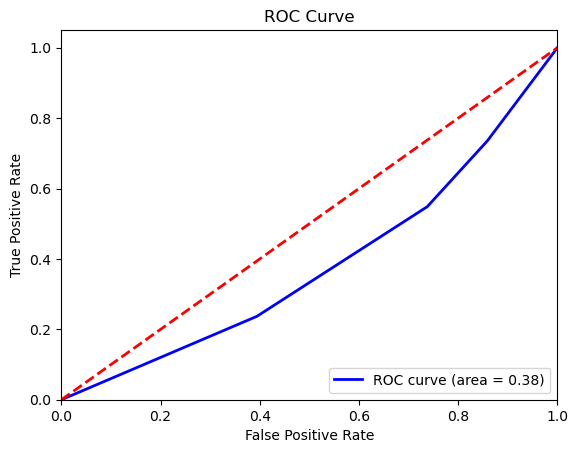

In [50]:
from sklearn.metrics import roc_curve, auc

y = relacao2["obito"].replace({"nao":0, "sim":1})

# ROC Curve
fpr, tpr, _ = roc_curve(y, modelo2.fittedvalues)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## **Modelo 3: Variável independente numérica**

Relação da pessoa ir a óbito com sua idade
Vamos fazer uma análise para a cidade de Santos e testar em outra cidade

In [51]:
relacao3 = doenca_pre.loc[doenca_pre.nome_munic == 'Santos']

In [52]:
relacao3.head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
43,Santos,3548500,42.0,MASCULINO,CONFIRMADO,2020-12-02,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
47,Santos,3548500,43.0,MASCULINO,CONFIRMADO,2020-06-03,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
53,Santos,3548500,51.0,MASCULINO,CONFIRMADO,2020-12-06,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
206,Santos,3548500,23.0,FEMININO,CONFIRMADO,2020-05-18,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
267,Santos,3548500,46.0,MASCULINO,CONFIRMADO,2020-10-17,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


Verificando as dimensões da nossa tabela de dados

In [53]:
relacao3.shape

(21728, 20)

Verificar como reconheceu a idade

In [54]:
relacao3.dtypes

nome_munic                  object
codigo_ibge                  int64
idade                      float64
cs_sexo                     object
diagnostico_covid19         object
data_inicio_sintomas        object
obito                        int64
asma                        object
cardiopatia                 object
diabetes                    object
doenca_hematologica         object
doenca_hepatica             object
doenca_neurologica          object
doenca_renal                object
imunodepressao              object
obesidade                   object
outros_fatores_de_risco     object
pneumopatia                 object
puerpera                    object
sindrome_de_down            object
dtype: object

Valores Missing (NAN)

In [55]:
relacao3.isnull().sum()

nome_munic                   0
codigo_ibge                  0
idade                       11
cs_sexo                      0
diagnostico_covid19          0
data_inicio_sintomas       145
obito                        0
asma                         0
cardiopatia                  0
diabetes                     0
doenca_hematologica          0
doenca_hepatica              0
doenca_neurologica           0
doenca_renal                 0
imunodepressao               0
obesidade                    0
outros_fatores_de_risco      0
pneumopatia                  0
puerpera                     0
sindrome_de_down             0
dtype: int64

Excluir valores missing

In [56]:
relacao3.dropna(subset=['idade'], inplace=True)

Verificando a relação entre idade e obito com um gráfico de dispersão

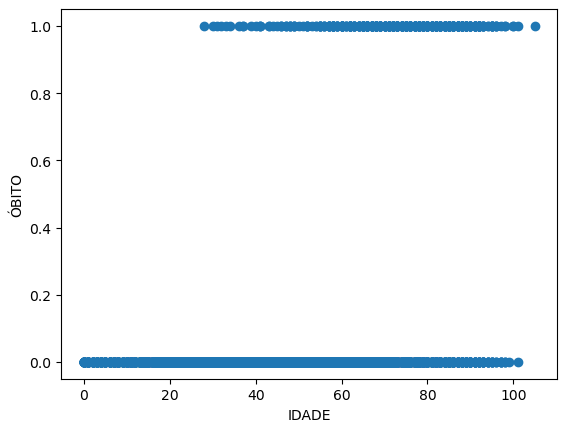

In [57]:
import matplotlib.pyplot as plt
plt.scatter(relacao3.idade,relacao3.obito)
plt.xlabel('IDADE')
plt.ylabel('ÓBITO')
plt.grid(False)
plt.show()

**Correlação**

Não há multicolinearidade -> correlação fraca

In [58]:
np.corrcoef(relacao3.obito, relacao3.idade)

array([[1.        , 0.28005415],
       [0.28005415, 1.        ]])

### **Criação do modelo 3 com StatsModels**

In [59]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [60]:
modelo3 = smf.glm(formula='obito ~ idade', data=relacao3, family = sm.families.Binomial()).fit()
print(modelo3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  obito   No. Observations:                21717
Model:                            GLM   Df Residuals:                    21715
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1799.5
Date:                Mon, 24 Jun 2024   Deviance:                       3599.0
Time:                        12:17:18   Pearson chi2:                 1.81e+04
No. Iterations:                     8   Pseudo R-squ. (CS):            0.07611
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.2259      0.243    -42.104      0.0

**Análise do modelo:**


*   Verificar a significancia dos coeficintes (Teste de Wald):
    * Estatisticamente significativo: p <= 0,05
    * Estatisticamente não é significativo: p > 0,05

*   Análise de Resíduos
    




### Deviance Residuals

**Hipótese Testada:**

-   $H_0$: O modelo ajusta bem os dados.

-   $H_a$: O modelo não ajusta bem os dados.

**Condição de Aceitação/Rejeição:**

-   A deviance total é comparada com uma distribuição qui-quadrado com $n - p$ graus de liberdade, onde $n$ é o número de observações e $p$ é o número de parâmetros no modelo.

-   **Aceitação de** $H_0$: Se o valor $p$ calculado a partir da deviance é maior que $\alpha$, aceitamos $H_0$ e concluímos que o modelo ajusta bem os dados.

-   **Rejeição de** $H_0$: Se o valor $p$ é menor que $\alpha$, rejeitamos $H_0$ e concluímos que o modelo não ajusta bem os dados.


In [61]:
deviance_test_statistic = modelo3.deviance
deviance_df = modelo3.df_resid
deviance_p_value = 1 - stats.chi2.cdf(deviance_test_statistic, deviance_df)

print("Teste de Deviance para os Resíduos:")
print("Estatística de teste:", deviance_test_statistic)
print("Graus de liberdade:", deviance_df)
print("Valor p:", deviance_p_value)

Teste de Deviance para os Resíduos:
Estatística de teste: 3598.9778376807926
Graus de liberdade: 21715
Valor p: 1.0


### Pearson Chi-Square Test

**Hipótese Testada:**

-   $H_0$: O modelo ajusta bem os dados.

-   $H_a$: O modelo não ajusta bem os dados.

**Condição de Aceitação/Rejeição:**

-   Calcula-se a estatística do teste qui-quadrado de Pearson, que segue uma distribuição qui-quadrado com $n - p$ graus de liberdade.

-   **Aceitação de** $H_0$: Se o valor $p$ é maior que $\alpha$, aceitamos $H_0$ e concluímos que o modelo ajusta bem os dados.

-   **Rejeição de** $H_0$: Se o valor $p$ é menor que $\alpha$, rejeitamos $H_0$ e concluímos que o modelo não ajusta bem os dados.


In [62]:
# Obtendo os resíduos de Pearson
residuos_pearson = modelo3.resid_pearson

# Teste de Pearson para os Resíduos
pearson_test_statistic = np.sum(residuos_pearson**2)
pearson_df = len(residuos_pearson) - modelo3.df_model - 1  # Graus de liberdade corrigidos
pearson_p_value = 1 - stats.chi2.cdf(pearson_test_statistic, pearson_df)

print("\nTeste de Pearson para os Resíduos:")
print("Estatística de teste:", pearson_test_statistic)
print("Graus de liberdade:", pearson_df)
print("Valor p:", pearson_p_value)


Teste de Pearson para os Resíduos:
Estatística de teste: 18102.517494493986
Graus de liberdade: 21715
Valor p: 1.0


### Interpretação dos coeficientes

In [63]:
# Razão de chance com Intervalo de confiança de 95%
np.exp(modelo3.params[1])

1.1178251900757508

### ROC Curve and AUC

Avalia a capacidade do modelo de discriminar entre as classes.

**Curva ROC**: Traça a taxa de verdadeiros positivos (sensibilidade) contra a taxa de falsos positivos (1 - especificidade) para vários limiares de classificação.

**AUC (Área Sob a Curva)**: Um valor próximo de 1 indica excelente discriminação, enquanto um valor próximo de 0.5 indica discriminação aleatória. -

**Avaliação do Modelo**: Um modelo com AUC maior é considerado melhor em discriminar entre as classes.

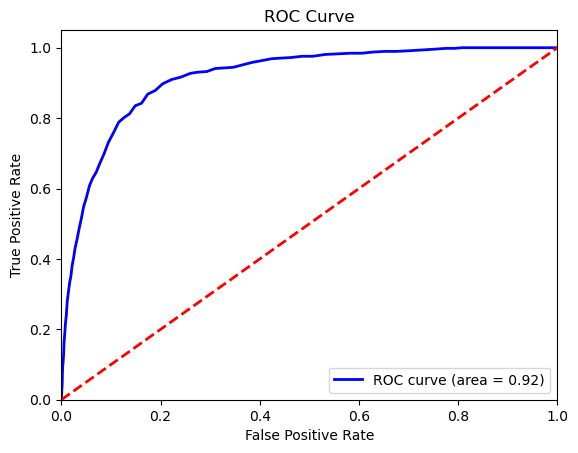

In [64]:
y = relacao3["obito"].replace({"nao":0, "sim":1})

# ROC Curve
fpr, tpr, _ = roc_curve(y, modelo3.fittedvalues)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### **Criação do modelo 3 com Sklearn**

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
relacao3.head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
43,Santos,3548500,42.0,MASCULINO,CONFIRMADO,2020-12-02,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
47,Santos,3548500,43.0,MASCULINO,CONFIRMADO,2020-06-03,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
53,Santos,3548500,51.0,MASCULINO,CONFIRMADO,2020-12-06,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
206,Santos,3548500,23.0,FEMININO,CONFIRMADO,2020-05-18,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
267,Santos,3548500,46.0,MASCULINO,CONFIRMADO,2020-10-17,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


Existe uma diferença na estruturação das informações nas bibliotecas Sklearn e Statsmodels.

No Statsmodels colocamos a formula : Y ~ X
Já no Sklearn temos que criar as variáveis independentes e dependentes.

e neste caso ainda temos que realizar um transformação na variável X , para matriz.

In [67]:
x = relacao3.iloc[:, 2].values
y = relacao3.iloc[:, 6].values

In [68]:
x

array([42., 43., 51., ..., 36., 75., 37.])

In [69]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Transformando X para matriz :

In [70]:
x = x.reshape(-1,1)
x

array([[42.],
       [43.],
       [51.],
       ...,
       [36.],
       [75.],
       [37.]])

Ajustando o modelo

In [71]:
modelo3s = LogisticRegression()
modelo3s.fit(x, y)

LogisticRegression()

Verificando o coeficiente do modelo

In [72]:
modelo3s.coef_

array([[0.11138299]])

Verificando o intercepto

In [73]:
modelo3s.intercept_

array([-10.22572933])

Razão de chance com Intervalo de confiança de 95%

In [74]:
np.exp(modelo3s.coef_)

array([[1.11782294]])

CONCLUSÃO:

Para cada ano mais velho, o indivíduo aumenta em 1,12 a chance de ir a óbito

Fazendo o gráfico com a função sigmoide

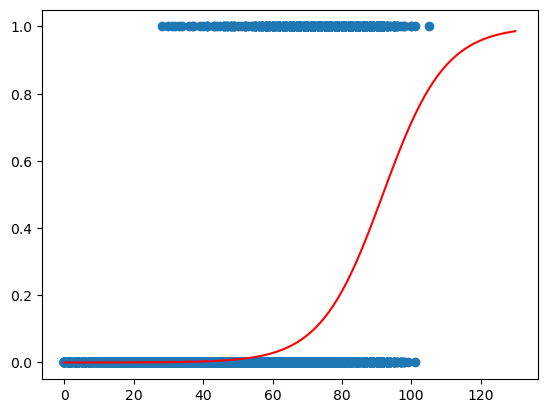

In [75]:
plt.scatter(x, y)
# Geração de novos dados para gerar a função sigmoide
x_teste = np.linspace(0, 130, 100)

def model(w):   # função sigmoide
    return 1 / (1 + np.exp(-w))
# Geração de previsões (variável r) e visualização dos resultados
previsao = model(x_teste * modelo3s.coef_ + modelo3s.intercept_).ravel()
plt.plot(x_teste, previsao, color = 'red');